In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [3]:
class LogisticRegression:

    def predict(self, features, weights):
        return self.sigmoid(np.dot(features, weights))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, features, labels, weights):
        predictions = self.predict(features, weights)
        observations = labels.shape[0]
        total_cost = -(np.dot(np.log(predictions).transpose(), labels) + np.dot(np.log(1 - predictions).transpose(),
                                                                     1 - labels)) [0][0]
        return total_cost/observations

    def update_weights(self, weights, features, labels, lr):
        predictions = self.predict(features, weights)
        gradient = np.dot(features.transpose(), predictions - labels)
        observations = labels.shape[0]
        weights = weights - (lr / observations) * gradient
        return weights

    def train(self, features, labels, weights, lr, iters):
        cost_history = []
        for i in range(iters):
            weights = self.update_weights(weights, features, labels, lr)
            cost_history.append((i, self.compute_cost(features, labels, weights)))

        return weights, cost_history

    def decision(self, prob):
        return 1 if prob > 0.5 else 0

    def classify(self, features, weights):
        predictions = self.predict(features, weights)
        decision = np.vectorize(self.decision)
        return decision(predictions)

    def accuracy(self, true_labels, predicted_labels):
        correct = 0
        total_labels = len(true_labels)
        for i in range(len(true_labels)):
            if true_labels[i] == predicted_labels[i]:
                correct+=1
        return (correct/total_labels)*100


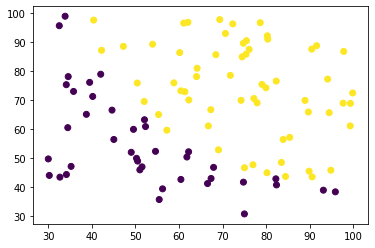

In [4]:
# Loading and Visualizing data
data = np.loadtxt('ex2/ex2data1.txt',delimiter=',')
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.show()

In [5]:
# Data Processing
train_X = data[:,:-1]
std_scale= preprocessing.StandardScaler().fit(train_X)
standardized_X = std_scale.transform(train_X)
train_features = np.append(np.ones((standardized_X.shape[0], 1)), standardized_X , axis=1)
train_labels = data[:,-1].reshape(-1,1)
logistic_regression= LogisticRegression()
weights = np.zeros((train_features.shape[1], 1))

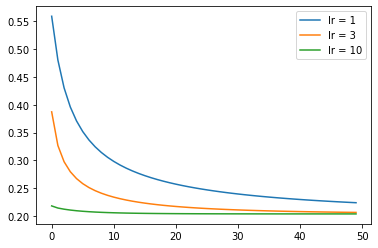

In [10]:
# Choosing learning rate
# weights = np.zeros((features.shape[1], 1))
# weights, cost_history = logistic_regression.train(features, labels, weights, 0.0001, 50)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.0001")
# weights = np.zeros((features.shape[1], 1))
# weights, cost_history = logistic_regression.train(features, labels, weights, 0.0003, 50)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.0003")
# # weights = np.zeros((features.shape[1], 1))
# weights, cost_history = logistic_regression.train(features, labels, weights, 0.001, 50)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.001")
# weights = np.zeros((features.shape[1], 1))
# weights, cost_history = logistic_regression.train(features, labels, weights, 0.003, 50)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.003")
# weights = np.zeros((features.shape[1], 1))
# weights, cost_history = logistic_regression.train(features, labels, weights, 0.01, 50)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.01")
# weights = np.zeros((features.shape[1], 1))
# weights, cost_history = logistic_regression.train(features, labels, weights, 0.03, 50)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.03")
# weights = np.zeros((features.shape[1], 1))
# weights, cost_history = logistic_regression.train(features, labels, weights, 0.1, 50)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.1")
# weights = np.zeros((features.shape[1], 1))
# weights, cost_history = logistic_regression.train(features, labels, weights, 0.3, 50)
# plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 0.3")
weights = np.zeros((train_features.shape[1], 1))
weights, cost_history = logistic_regression.train(train_features, train_labels, weights, 1, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 1")
weights = np.zeros((train_features.shape[1], 1))
weights, cost_history = logistic_regression.train(train_features, train_labels, weights, 3, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 3")
weights = np.zeros((train_features.shape[1], 1))
weights, cost_history = logistic_regression.train(train_features, train_labels, weights, 10, 50)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 10")
plt.legend()

[[1.71835438]
 [3.99258451]
 [3.72493998]] (0, 0.5594032425456552) (1499, 0.20349770184680793)


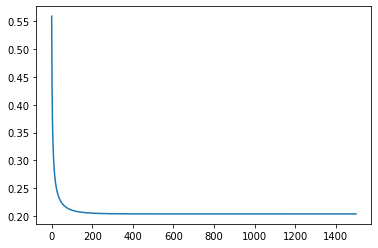

In [11]:
# choosing learning rate 3
weights = np.zeros((train_features.shape[1], 1))
weights, cost_history = logistic_regression.train(train_features, train_labels, weights,1, 1500)
plt.plot([cost_history[i][0] for i in range(len(cost_history))], [cost_history[i][1] for i in range(len(cost_history))], label = "lr = 1")
print(weights, cost_history[0], cost_history[-1])

In [13]:
predictions = logistic_regression.classify(train_features, weights)
print("train_data_accuracy = ",logistic_regression.accuracy(train_labels, predictions))
test_X = np.array([[45, 85]])
standardized_test_X = std_scale.transform(test_X)
test_features = np.append(np.ones((test_X.shape[0], 1)),standardized_test_X , axis=1)
logistic_regression.predict(test_features, weights)

train_data_accuracy =  89.0


array([[0.77627712]])

In [17]:
# Calculating mean and std of data to construct decision boundary
print(np.mean(train_X[:,0]),np.mean(train_X[:,1]), np.std(train_X[:,0]), np.std(train_X[:,1]))
mean_x = np.mean(train_X[:,0])
std_x = np.std(train_X[:,0])
mean_y = np.mean(train_X[:,1])
std_y =  np.std(train_X[:,1])

65.64427405732314 66.22199808811695 19.360686712476134 18.48963567058878


In [18]:
# Plotting decision boundary
def func_y(w0, w1, w2, x):
    x_coeff = ((w1*(x-mean_x))/std_x)
    return -((std_y/w2)*(w0+x_coeff))+mean_y

x = [28, 101]
y = [func_y(weights[0], weights[1], weights[2],x[i]) for i in range(len(x))]
x, y

([28, 101], [array([96.2262904]), array([21.50139856])])

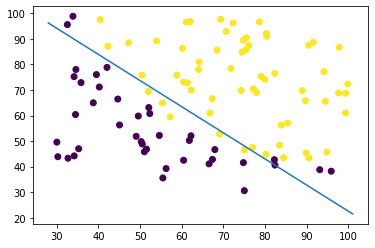

In [19]:
plt.scatter(data[:,0],data[:,1],c=data[:,2])
plt.plot(x,y)